In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
pd.set_option('display.max_columns', None)

In [14]:
ruta = r"C:\Users\MartínPazYáñez\Desktop\iron\bootcamp\Module 3\lab-eda-univariate\amz_uk_price_prediction_dataset.csv"
df = pd.read_csv(ruta)

df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


Part 1: Understanding Product Categories
Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

Frequency Tables:

Generate a frequency table for the product category.
Which are the top 5 most listed product categories?

MEASURES OF CENTRALITY
Mean: 2.15
Median: 0.00
Mode: 0.00

MEASURES OF DISPERSION
Variance: 4.82
Standard Deviation: 2.19
Range: 5.00
IQR: 4.40

SHAPE OF THE DISTRIBUTION
Skewness: 0.08
Kurtosis: -1.93

VISUALIZATION


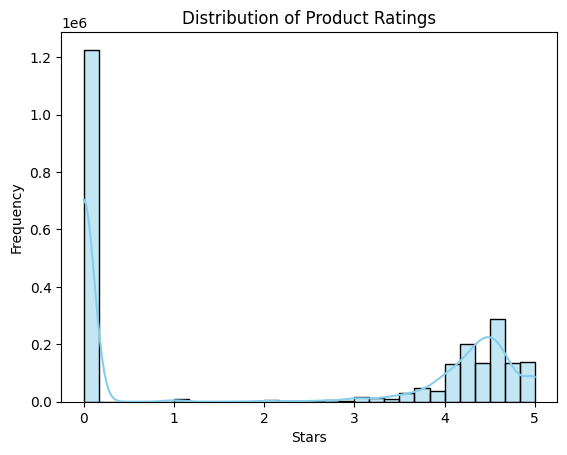

In [56]:
print("Table dimensions:")
df.shape

print("Data types:")
print(df.dtypes)

# ====================
# Retrieving the unique data types present in the dataframe columns
# ====================
print("Unique data types in the dataframe:")
print(list(set(df.dtypes.tolist())))

# ====================
# Numerical columns
# ====================
print("Numerical columns:")
print(df.select_dtypes("number").columns)

In [38]:
df_category = df.category.value_counts().head(5)

C:\Users\MartínPazYáñez\AppData\Local\Temp\ipykernel_37476\757245453.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_category.index, y=df_category.values, palette="Set3");


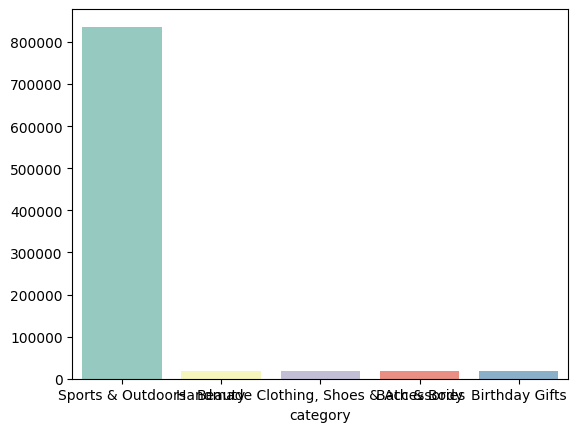

In [39]:
sns.barplot(x=df_category.index, y=df_category.values, palette="Set3");

<Axes: ylabel='count'>

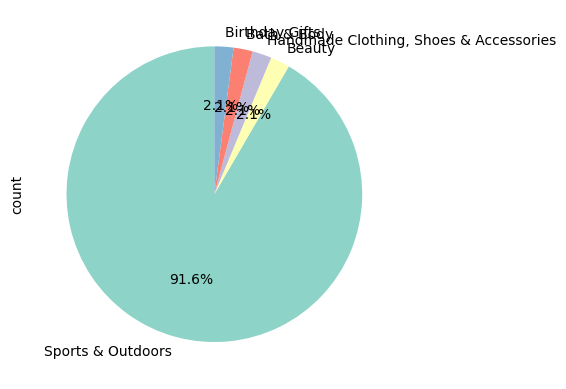

In [40]:
df_category.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))

Part 2: Delving into Product Pricing
Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

Measures of Centrality:

Calculate the mean, median, and mode for the price of products.
What's the average price point of products listed? How does this compare with the most common price point (mode)?
Measures of Dispersion:

Determine the variance, standard deviation, range, and interquartile range for product price.
How varied are the product prices? Are there any indicators of a significant spread in prices?
Visualizations:

Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.


In [45]:
df.price.describe()


count    2.443651e+06
mean     8.924381e+01
std      3.456089e+02
min      0.000000e+00
25%      9.990000e+00
50%      1.909000e+01
75%      4.599000e+01
max      1.000000e+05
Name: price, dtype: float64

In [47]:
print("Mean:", df['price'].mean())
print("Median:", df['price'].median())
print("Mode:", df['price'].mode())

print("\nVariance:", df['price'].var())
print("Standard Deviation:", df['price'].std())
print("Range:", df['price'].max() - df['price'].min())
print("\nQuantiles (25% and 75%):")
print(df['price'].quantile([0.25, 0.75]))

Mean: 89.24380943923661
Median: 19.09
Mode: 0    9.99
Name: price, dtype: float64

Variance: 119445.48532254901
Standard Deviation: 345.60886175349873
Range: 100000.0

Quantiles (25% and 75%):
0.25     9.99
0.75    45.99
Name: price, dtype: float64


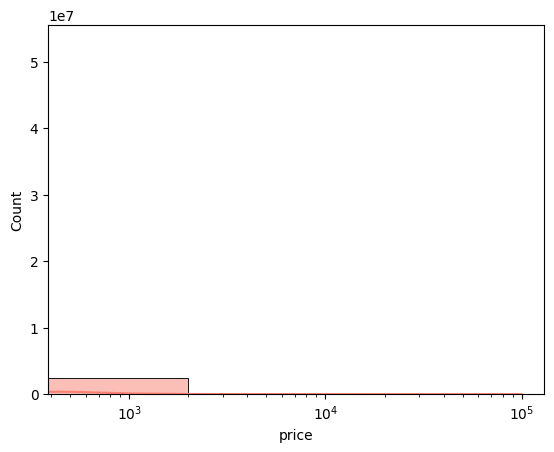

In [53]:
sns.histplot(df['price'], kde=True, bins=50, color="salmon")
plt.xscale('log')


<Axes: xlabel='price', ylabel='Count'>

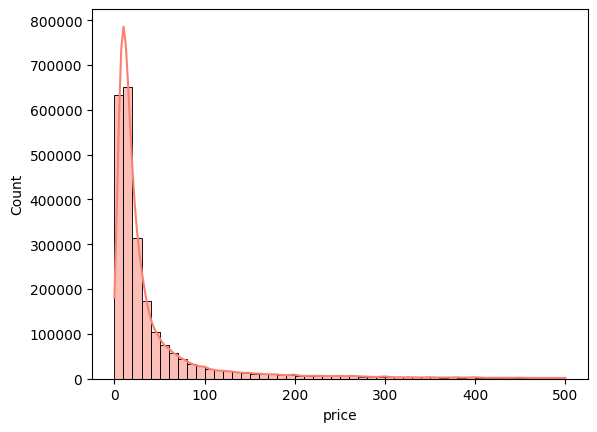

In [54]:
sns.histplot(df[(df['price'] > 0) & (df['price'] < 500)]['price'],
             kde=True, bins=50, color="salmon")


Part 3: Unpacking Product Ratings
Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

Measures of Centrality:

Calculate the mean, median, and mode for the rating of products.
How do customers generally rate products? Is there a common trend?
Measures of Dispersion:

Determine the variance, standard deviation, and interquartile range for product rating.
Are the ratings consistent, or is there a wide variation in customer feedback?
Shape of the Distribution:

Calculate the skewness and kurtosis for the rating column.
Are the ratings normally distributed, or do they lean towards higher or lower values?
Visualizations:

Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?


MEASURES OF CENTRALITY
Mean: 2.15
Median: 0.00
Mode: 0.00

MEASURES OF DISPERSION
Variance: 4.82
Standard Deviation: 2.19
Range: 5.00
IQR: 4.40

SHAPE OF THE DISTRIBUTION
Skewness: 0.08
Kurtosis: -1.93

VISUALIZATION


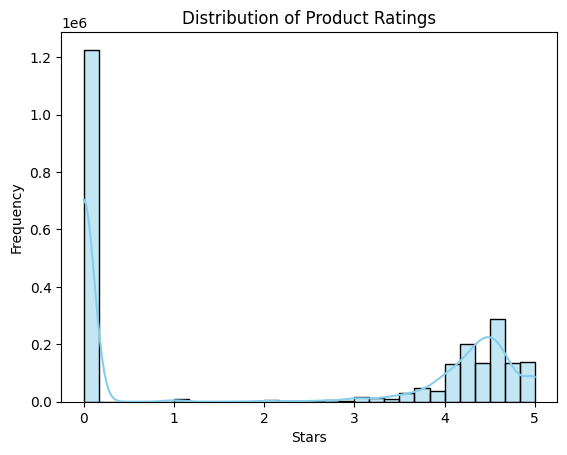

In [57]:
# ===================================
# Part 3: Unpacking Product Ratings
# ===================================

print("MEASURES OF CENTRALITY")
print(f"Mean: {df['stars'].mean():.2f}")
print(f"Median: {df['stars'].median():.2f}")
print(f"Mode: {df['stars'].mode().values[0]:.2f}")

print("\nMEASURES OF DISPERSION")
print(f"Variance: {df['stars'].var():.2f}")
print(f"Standard Deviation: {df['stars'].std():.2f}")
print(f"Range: {df['stars'].max() - df['stars'].min():.2f}")
q25, q75 = df['stars'].quantile([0.25, 0.75])
print(f"IQR: {q75 - q25:.2f}")

print("\nSHAPE OF THE DISTRIBUTION")
print(f"Skewness: {df['stars'].skew():.2f}")
print(f"Kurtosis: {df['stars'].kurtosis():.2f}")

print("\nVISUALIZATION")
sns.histplot(df['stars'], kde=True, bins=30, color="skyblue")
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.title('Distribution of Product Ratings')
plt.show()